# Introduction

### FEATURES 
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.

<span style='color:MediumVioletRed'><font size="4">Importing the necessary library </span><br></font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

In [2]:
df = pd.read_csv("flight dataset.csv") 

In [3]:
target='price'

In [4]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


## DATA CLEANING

In [6]:
# Dropping the useless column 'Unnamed: 0'
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.isnull().sum()         ##Finding the null values

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

**Dataset has zero null values.**

In [8]:
symbols = ["?","$","#","$","%","&","*","+","@","_","-"]
def remove_spchar(x):
    for column in x.values:
        for symbol in symbols:
            if symbol not in column:
                print("Special Character Not detected")
                return x
            else:
                print("Special Character Detected and will be Removed: ")
                x2 = x.replace(symbol,np.nan)
                return x2
        
df= remove_spchar(df)
df.head()

Special Character Not detected


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [9]:
def get_null_counts(df):
    null_count_df = pd.DataFrame((df.isnull().sum()).sort_values(ascending=False).reset_index())
    null_count_df.columns = ['column_name','null_counts']

    return null_count_df

null_= get_null_counts(df)
null_.style.background_gradient(cmap='YlOrRd')

,column_name,null_counts
0,airline,0
1,flight,0
2,source_city,0
3,departure_time,0
4,stops,0
5,arrival_time,0
6,destination_city,0
7,class,0
8,duration,0
9,days_left,0


In [10]:
print(f"Dataset has {df.duplicated().sum()} duplicated values.")            ##Finding the duplicate values

Dataset has 0 duplicated values.


### Correlation

In [11]:
df.corr(method='kendall')

,duration,days_left,price
duration,1.000000,-0.022397,0.214285
days_left,-0.022397,1.000000,-0.185616
price,0.214285,-0.185616,1.000000


# NUMERICAL COLS

In [12]:
num_col=numerical_cols=df.select_dtypes(exclude=['object']).columns

df[numerical_cols].head(5)

,duration,days_left,price
0,2.17,1,5953
1,2.33,1,5953
2,2.17,1,5956
3,2.25,1,5955
4,2.33,1,5955


# CATEGORICAL COLS

In [13]:
categorical_cols=df.select_dtypes(include=['object']).columns
df[categorical_cols].head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy


In [14]:
#DROPPING FLIGHTS FOR VISUALIZATION
df2=df.drop('flight',axis=1)

### Insights

In [15]:
df['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

In [16]:
df['destination_city'].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [17]:
def plot_categorical_columns(data):
    # Plotting code goes here
    for column in data.columns.sort_values(ascending=False):
        if data[column].dtype == "object":
            sns.countplot(x=column ,data=data.reset_index(),palette='viridis')
            plt.show()

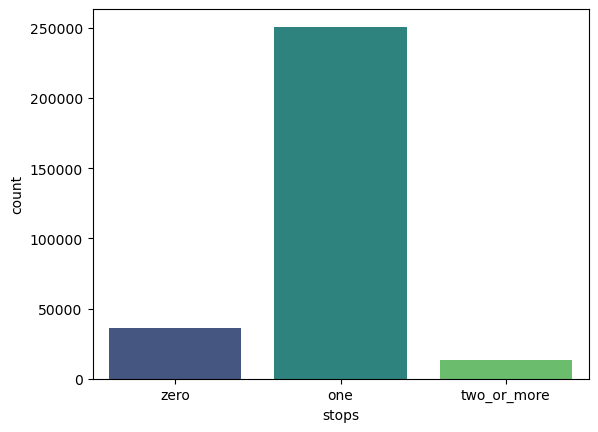

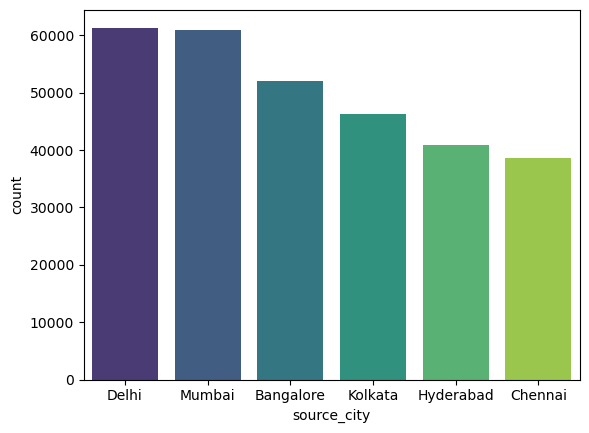

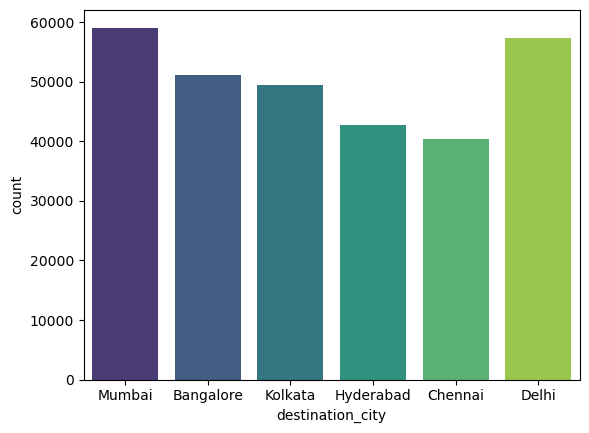

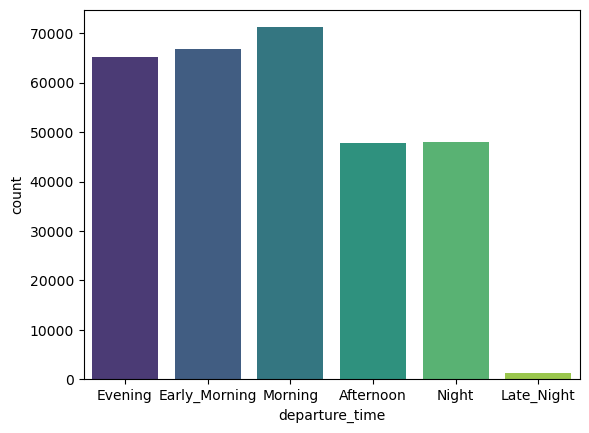

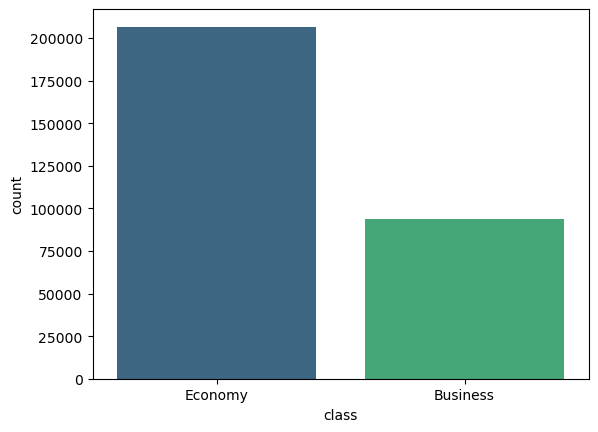

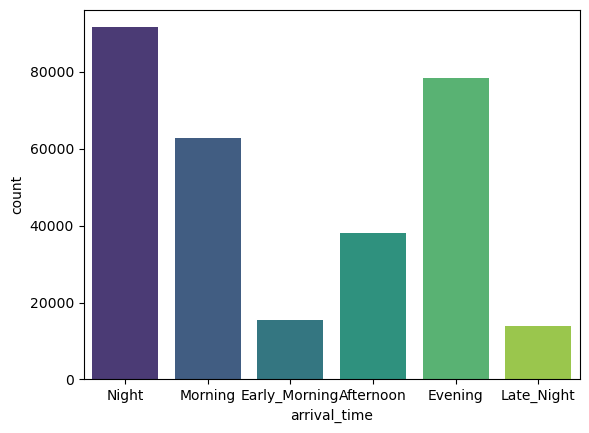

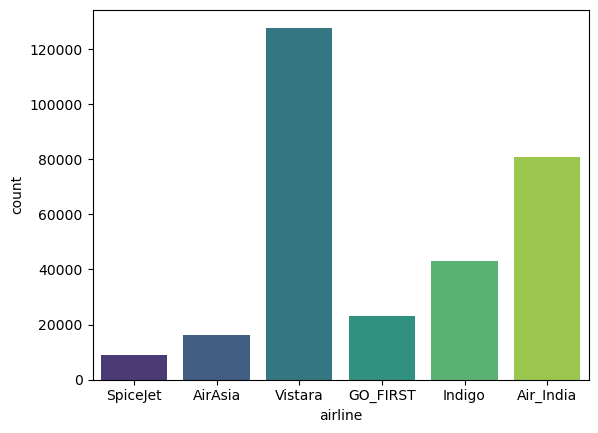

In [18]:
plot_categorical_columns(df2)

In [19]:
air=pd.DataFrame(df['airline'].value_counts())
air.reset_index(inplace=True)

In [20]:
air

,index,airline
0,Vistara,127859
1,Air_India,80892
2,Indigo,43120
3,GO_FIRST,23173
4,AirAsia,16098
5,SpiceJet,9011


In [21]:
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

blue_grad = ["#0000FF","#4169E1","#87CEEB","#ADD8E6","#B0C4DE"]
pink_grad = ["#FFC0CB" ,"#FF69B4","#FFB6C1","#FFC1CC","#FFA07A" ]

In [22]:
label=[air.columns[0]]

In [23]:
label

['index']

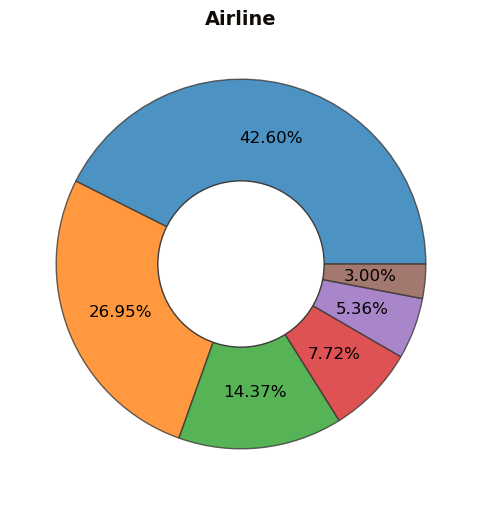

In [24]:
plt.figure(figsize=(6,6))
# label=[air.index.to_list()]

plt.title('Airline', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['airline'].value_counts(), 
#         labels=label, 
#         colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

In [25]:
df['source_city'].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

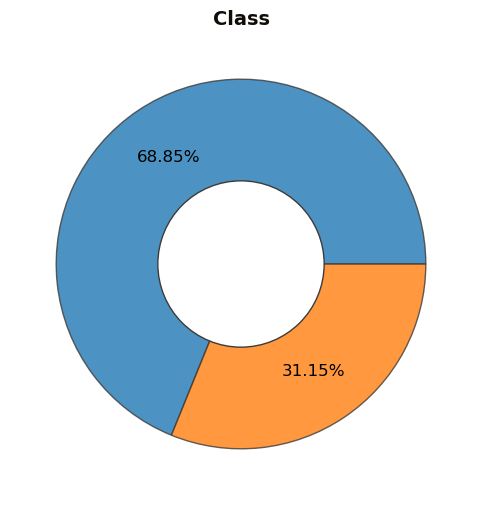

In [26]:
plt.figure(figsize=(6,6))
# label=[air.index.to_list()]

plt.title('Class', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df2['class'].value_counts(), 
#         labels=label, 
#         colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)
# plt.figure(figsize=(8,6))
# flight['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
# plt.title('Classes of Different Airlines',fontsize=15)
# plt.legend(['Economy','Business'])
# plt.show()


<span style='color:RebeccaPurple'><font size="2"> Most preferred class is Economic Class </span><br></font>

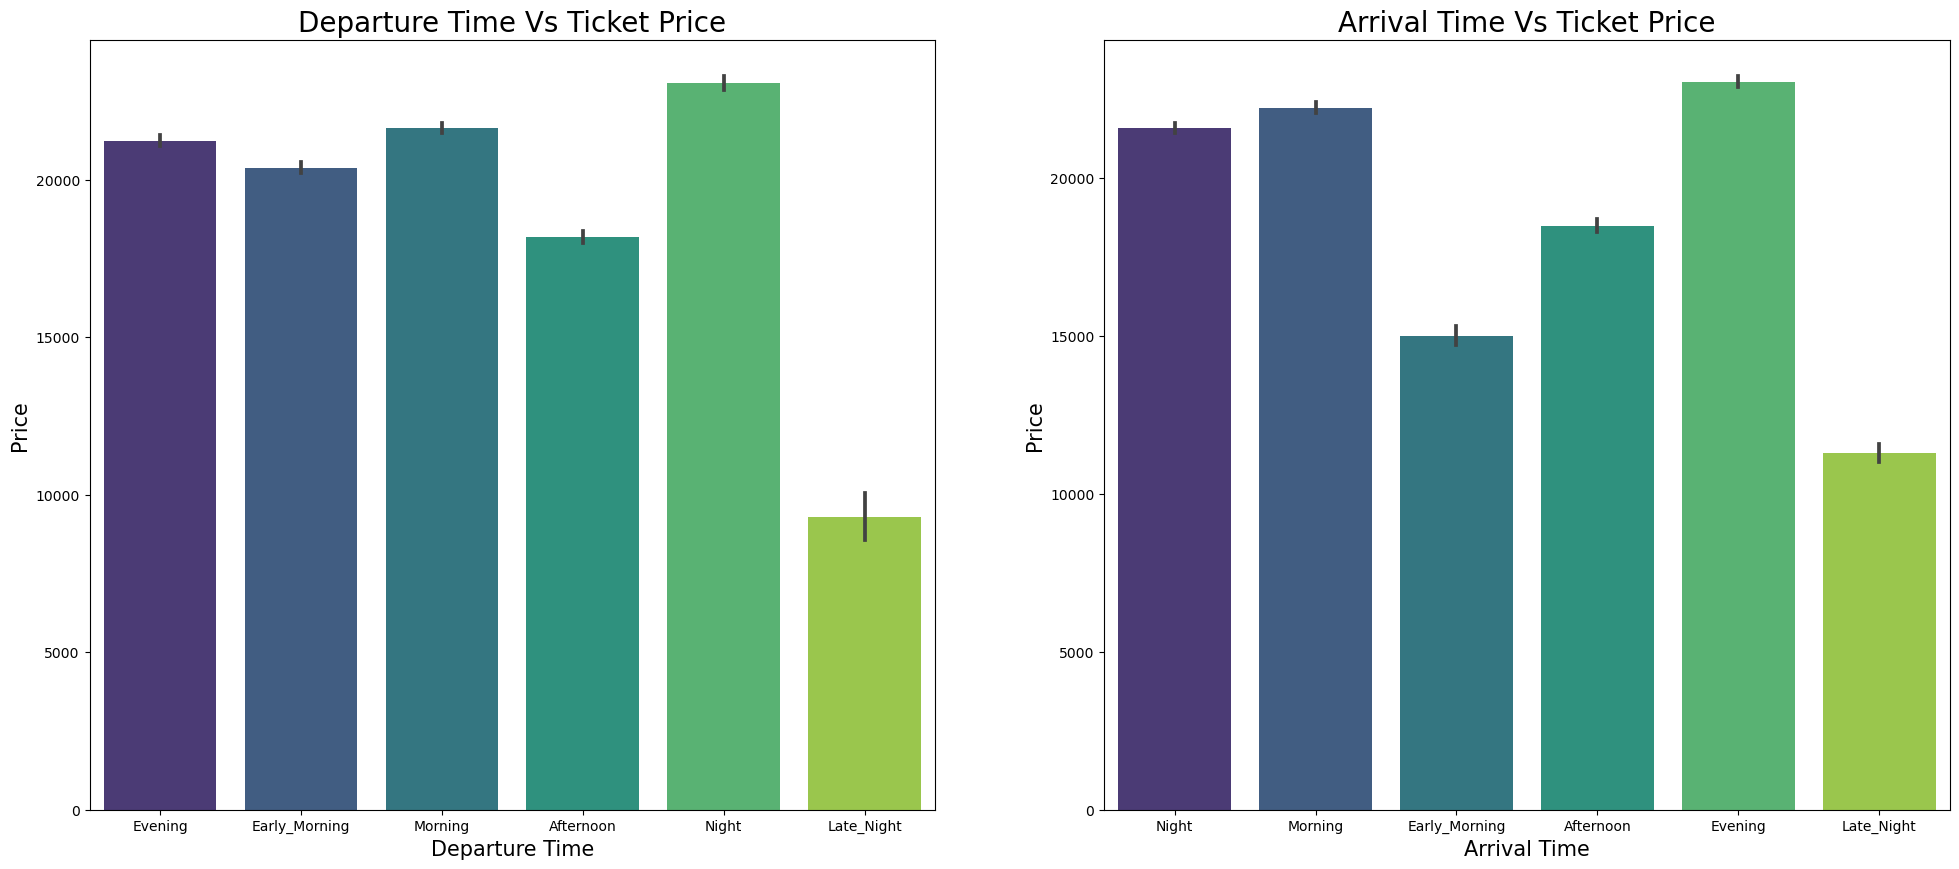

In [27]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.barplot(x='departure_time',y='price',data=df2,palette='viridis')
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.barplot(x='arrival_time',y='price',data=df2,palette='viridis')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

 **Pricing Change On Departure Time and Arrival time**

**Departure Time**

><span style='color:DarkMagenta'> Pricing of Night flights is more</span><br>
><span style='color:DarkMagenta'> Ticketing is almost equal Early_morning, Morning, Evening flights </span><br>
><span style='color:DarkMagenta'> Late nights flights have lowest fares </span><br> 
___
**Arrival Time**

><span style='color:Teal'> Pricing of Evening flights is more</span><br>
><span style='color:Teal'> Ticketing is almost equal Morning, Night flights </span><br>
><span style='color:Teal'> Early_Morning, Late nights flights have lowest fares </span><br> 

## Data Preprocessing

**Creating a backup file**

In [28]:
df_back=df.copy()

In [29]:
## Converting the categorical into numerical categorical by labelencoder
from sklearn.preprocessing import LabelEncoder

df_lab=LabelEncoder() ##Creating Variable for encoding

In [30]:
for col in df.columns:
    if df[col].dtype==categorical_cols:
        df[col]=df_lab.fit_transform(df[col])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


In [31]:
x=df.drop(target,axis=1)
y=df[target] 

In [32]:
##Splitting the test train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4000)
print('X Train: ',X_train.shape)
print('X Test:  ',X_test.shape)
print('y Train: ',y_train.shape)
print('y Test:  ',y_test.shape)

X Train:  (240122, 10)
X Test:   (60031, 10)
y Train:  (240122,)
y Test:   (60031,)


In [33]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmScalar= MinMaxScaler()
X_train=mmScalar.fit_transform(X_train)
X_test=mmScalar.fit_transform(X_test)
X_train.shape                         

(240122, 10)

### **Building the Regressor / RegressorModels**

In [34]:
##Importing the models
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

## Creating variables for different Models

print('---Ridge Regressor---')
model_ri= Ridge().fit(X_train, y_train)
print('---Lasso Regressor---')
model_La= Lasso(alpha=1.0).fit(X_train, y_train)
print('---Random Forest Regressor---')
model_rf= RandomForestRegressor().fit(X_train, y_train)

---Ridge Regressor---
---Lasso Regressor---
---Random Forest Regressor---


**Predicting Test data**

In [35]:
## Predicting Test data with different Regressor Models
print('---Ridge Regressor---')

price_pred_ri=model_ri.predict(X_test)

print('---Lasso Regressor---')

price_pred_La=model_La.predict(X_test)

print('---Random Tree Regressor---')

price_pred_rf=model_rf.predict(X_test)

---Ridge Regressor---
---Lasso Regressor---
---Random Tree Regressor---


##### **Evaluating the results of models**

<!-- ****
<span style='color:DarkCyan'><font size="4">Metrics</span><br></font>

<span style='color:DarkCyan'><font size="2">R2_Score:</span><br></font>**It is called coefficient of determination.R2 indicates the proportion of data points which lie within the line created by the regression equation.**

<span style='color:DarkCyan'><font size="2">MAE:</span><br></font>**It is used as evaluation metrics for regression models in machine learning. It calculates errors between actual values and values predicted by the model**

<span style='color:DarkCyan'><font size="2">RMAE:</span><br></font>

<span style='color:DarkCyan'><font size="2">MAE:</span><br></font>

<span style='color:DarkCyan'><font size="2">MAE:</span><br></font> -->

In [36]:

print('---Ridge Regressor---')
print("R2 Score: ",round(r2_score(y_test, price_pred_ri),3))
print('\n')

print('---Lasso Regressor---')
print("R2 Score: ",round(r2_score(y_test, price_pred_La),3))
print('\n')


print('---Random Forest Regressor---')
print("R2 Score: ",round(r2_score(y_test, price_pred_rf),3))

---Ridge Regressor---
R2 Score:  0.905


---Lasso Regressor---
R2 Score:  0.905


---Random Forest Regressor---
R2 Score:  0.984


**From the Above Results, The Top 3 Models by comparing Error R2_Score values are**

>**1. Random Forest Regressor**

**Training the Data with Random Forest Regressor**

In [37]:
rf_acc=round(r2_score(y_test, price_pred_rf),3)
la_acc=round(r2_score(y_test, price_pred_La),3)
ri_acc=round(r2_score(y_test, price_pred_ri),3)

In [38]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':price_pred_rf})
result=df_back.merge(out,left_index=True,right_index=True)

In [39]:
result.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
260552,Vistara,UK-850,Bangalore,Evening,one,Morning,Chennai,Business,12.92,36,44280,44280,44280.00
189474,Air_India,AI-766,Chennai,Morning,one,Evening,Mumbai,Economy,9.58,17,7579,7579,9106.95
142847,Indigo,6E-725,Kolkata,Evening,zero,Night,Hyderabad,Economy,2.08,5,11529,11529,9739.44
31868,GO_FIRST,G8-165,Delhi,Early_Morning,one,Afternoon,Hyderabad,Economy,7.25,25,5954,5954,5956.69
161258,Vistara,UK-890,Hyderabad,Evening,one,Morning,Mumbai,Economy,16.08,21,5060,5060,5018.82
194086,Air_India,AI-440,Chennai,Early_Morning,one,Night,Bangalore,Economy,13.92,5,16593,16593,17175.65
213193,Vistara,UK-637,Delhi,Evening,one,Evening,Bangalore,Business,25.08,17,45033,45033,44540.65
264851,Vistara,UK-720,Kolkata,Early_Morning,one,Afternoon,Mumbai,Business,7.83,14,62591,62591,64655.23
82415,Indigo,6E-5352,Mumbai,Night,zero,Late_Night,Chennai,Economy,1.92,38,3000,3000,3040.08
72958,Air_India,AI-774,Mumbai,Night,one,Night,Hyderabad,Economy,24.33,20,6145,6145,4735.35


In [40]:
result.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price', 'Price_actual', 'Price_pred'],
      dtype='object')

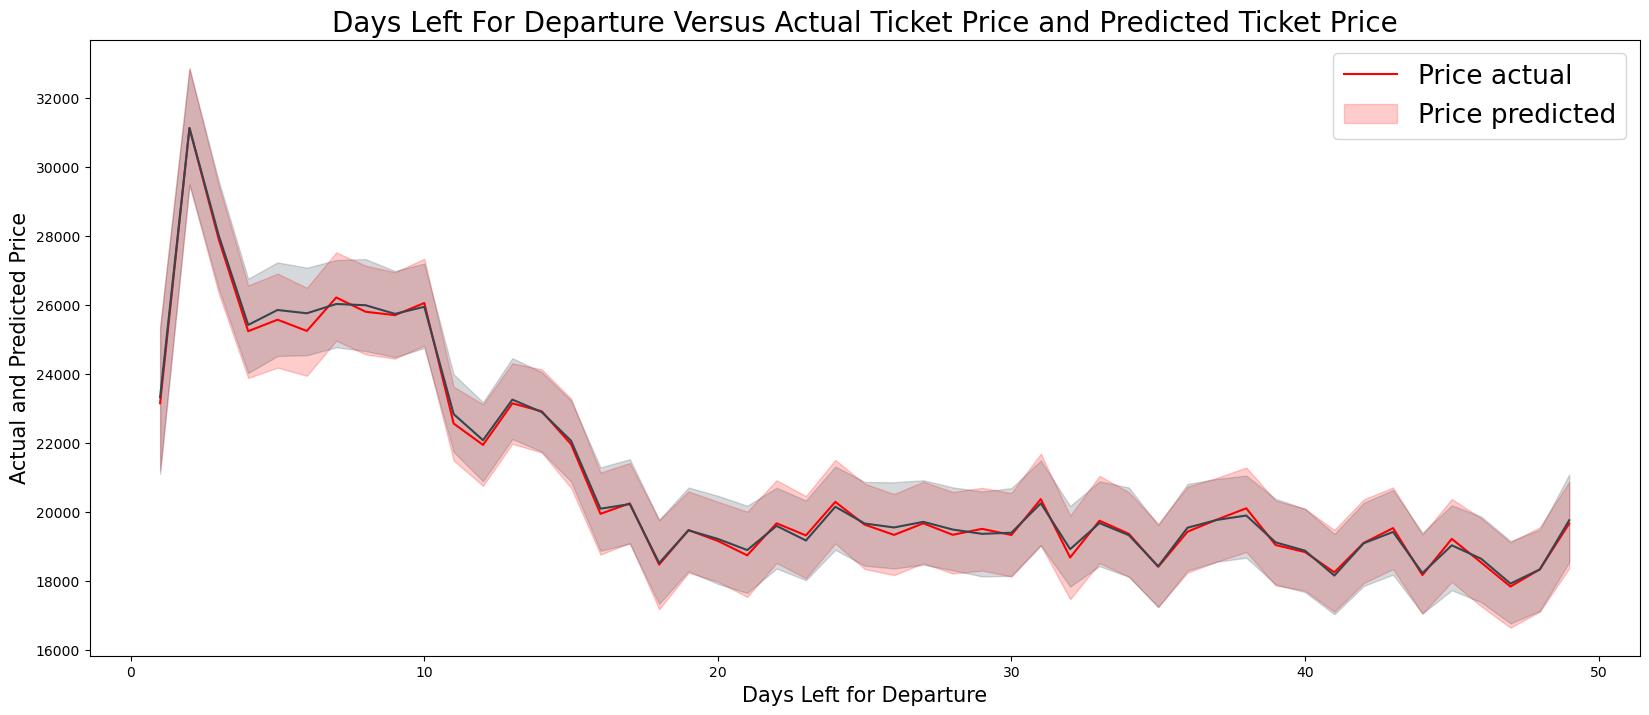

In [41]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x=result.columns[-4],y=result.columns[-2],color='red')
sns.lineplot(data=result,x=result.columns[-4],y=result.columns[-1],color='#36454F')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

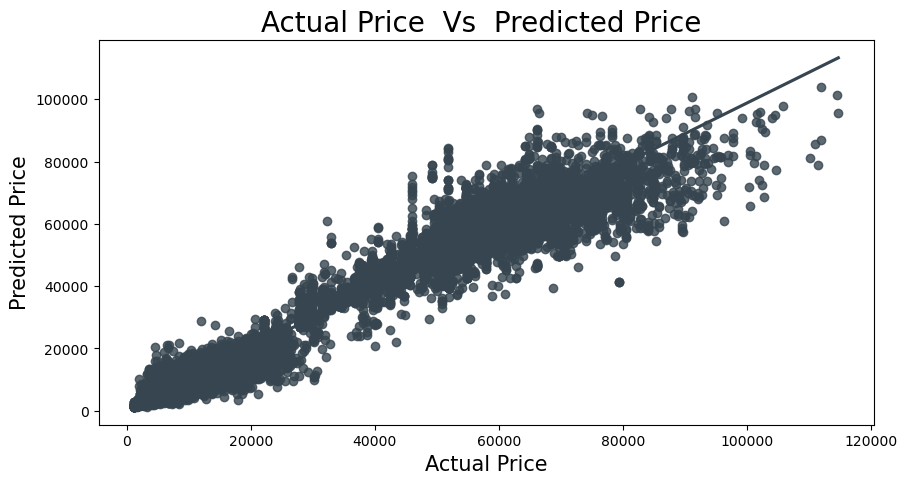

In [42]:
plt.figure(figsize=(10,5))
sns.regplot(x=result.columns[-2],y=result.columns[-1],data=result,color='#36454F')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)

plt.show()

# DEEP Learning

In [43]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor().fit(X_train, y_train)

D:\AnaConda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [44]:
y_pred = mlp.predict(X_test)

In [45]:
from sklearn.metrics import r2_score
print('Test Score R2: %.3f ' % (r2_score(y_test, y_pred)))

Test Score R2: 0.936 


In [46]:
mlp_acc=round(r2_score(y_test, y_pred),3)

# LSTM

In [47]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(df[target].values.reshape(-1, 1))

In [48]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, SimpleRNN

In [49]:
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]
optimizer = tf.keras.optimizers.Adam()
early_stopping = [tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5)]

In [50]:
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

240122 60031


In [51]:
look_back = 1000
look_back

1000

In [52]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [53]:
x_train, y_train = create_dataset(train, look_back=look_back)
x_test, y_test = create_dataset(test, look_back=look_back)

In [54]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(239121, 1000)
(239121,)
(59030, 1000)
(59030,)


In [55]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [56]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(239121, 1, 1000)
(239121,)
(59030, 1, 1000)
(59030,)


In [57]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back), return_sequences=True, kernel_initializer='glorot_uniform'))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss=tf.keras.losses.Huber(), optimizer='adam')
model.fit(x_train, y_train, epochs=100, batch_size=1000, verbose=1)

Epoch 1/100
240/240 [==============================] - 16s 21ms/step - loss: 0.0011
Epoch 2/100
240/240 [==============================] - 4s 17ms/step - loss: 5.2798e-04
Epoch 3/100
240/240 [==============================] - 4s 18ms/step - loss: 4.4570e-04
Epoch 4/100
240/240 [==============================] - 4s 18ms/step - loss: 3.7060e-04
Epoch 5/100
240/240 [==============================] - 4s 17ms/step - loss: 3.6269e-04
Epoch 6/100
240/240 [==============================] - 4s 16ms/step - loss: 3.3927e-04
Epoch 7/100
240/240 [==============================] - 4s 15ms/step - loss: 3.4280e-04
Epoch 8/100
240/240 [==============================] - 4s 16ms/step - loss: 3.1112e-04
Epoch 9/100
240/240 [==============================] - 4s 15ms/step - loss: 2.9825e-04
Epoch 10/100
240/240 [==============================] - 4s 15ms/step - loss: 3.1563e-04
Epoch 11/100
240/240 [==============================] - 4s 16ms/step - loss: 2.9836e-04
Epoch 12/100
240/240 [======================

240/240 [==============================] - 5s 19ms/step - loss: 2.1438e-04
Epoch 95/100
240/240 [==============================] - 4s 18ms/step - loss: 2.1563e-04
Epoch 96/100
240/240 [==============================] - 4s 18ms/step - loss: 2.1341e-04
Epoch 97/100
240/240 [==============================] - 4s 17ms/step - loss: 2.2166e-04
Epoch 98/100
240/240 [==============================] - 4s 17ms/step - loss: 2.1910e-04
Epoch 99/100
240/240 [==============================] - 4s 17ms/step - loss: 2.1317e-04
Epoch 100/100
240/240 [==============================] - 4s 17ms/step - loss: 2.1306e-04


In [58]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)

1845/1845 [==============================] - 4s 2ms/step


In [59]:
# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])


In [60]:
import math
# calculate root mean squared error
trainScore = r2_score(trainY[0], trainPredict[:,0])
print('Train Score R2: %.3f ' % (trainScore))
testScore = r2_score(testY[0], testPredict[:,0])
print('Test Score  R2: %.3f ' % (testScore))

Train Score R2: 0.982 
Test Score  R2: 0.662 


In [61]:
lstm_acc=round(testScore,3)

In [62]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [63]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

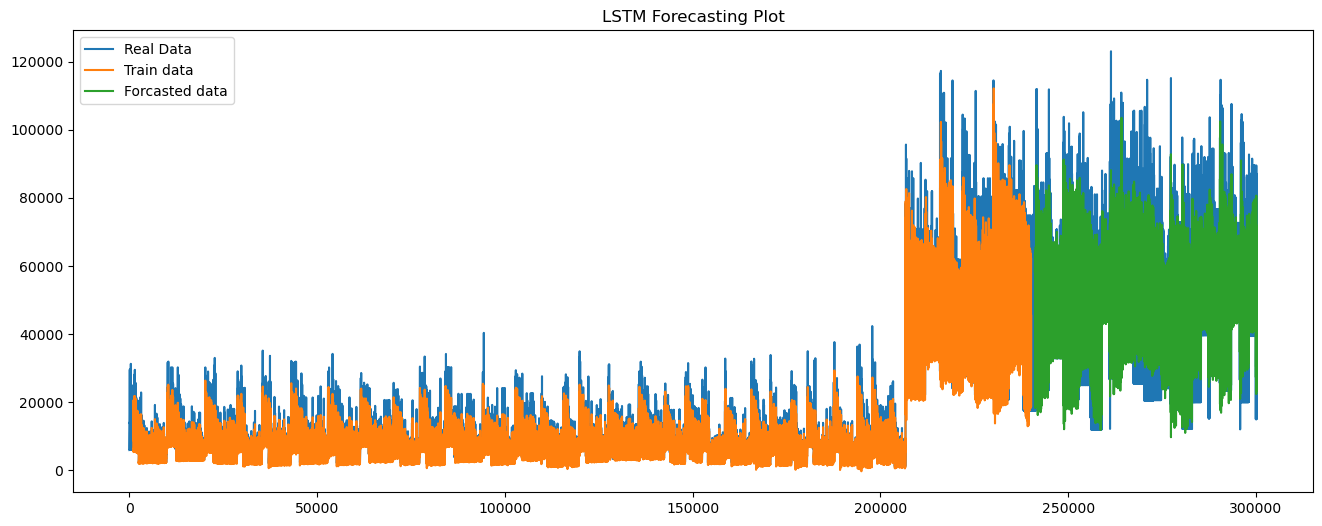

In [64]:
plt.figure(figsize=(16,6))
plt.plot(min_max_scaler.inverse_transform(dataset),label='Real Data')
plt.title("LSTM Forecasting Plot")

plt.plot(trainPredictPlot, label='Train data')
plt.plot(testPredictPlot,label='Forcasted data')
plt.legend()
plt.show()

# ANN

In [65]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
model.add(Dense(units=15, input_dim=len(x.columns.to_list()), kernel_initializer='normal', activation='relu'))
 
model.add(Dense(units=10, kernel_initializer='normal', activation='relu'))
 

model.add(Dense(5, kernel_initializer='normal'))
 
model.compile(loss=tf.keras.losses.Huber(), optimizer='adam',metrics=['mae'])
 
model.fit(X_train, y_train, batch_size=1000, epochs=200, verbose=1)

ValueError: Data cardinality is ambiguous:
  x sizes: 240122
  y sizes: 239121
Make sure all arrays contain the same number of samples.

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_true=[]
for i in range(0,len(y_pred)):
    y_true.append(y_pred[i][-1])

In [ ]:
print('Test Score R2: %.3f ' % (r2_score(y_test, y_true)))

In [ ]:
ann_acc=round(r2_score(y_test, y_true),3)

In [ ]:
classification_data = {'Classification Model':  ['RandomForest','Lasso','Ridge','LSTM','MLP','ANN'],
        'Score':     [rf_acc,ri_acc,la_acc,lstm_acc,mlp_acc,ann_acc]}

classification_comparision = pd.DataFrame (classification_data)


In [ ]:
classification_comparision

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import re
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from wordcloud import WordCloud
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

In [ ]:
fig = px.bar(data_frame=classification_comparision, y=classification_comparision.columns[1], 
             x=classification_comparision.columns[0],color_discrete_sequence=[pink_grad[4]])
fig.update_layout(title="Score")

fig.update_traces(dict(marker_line_width=.1))

fig.update_layout(title_x = 0.5)

fig.update_xaxes(tickangle=0)

fig.update_yaxes(tickangle=0)

# fig.update_layout(hovermode='x unified')

fig.update_layout(template="seaborn",font = dict(family = "PT Sans", size = 15, color = "black"))

fig.show()